In [1]:
import pandas as pd

In [2]:
mind_news = pd.read_table('data/MINDlarge_train/news.tsv',header=None,
                          names=['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [3]:
len(mind_news)

51282

In [4]:
#mind_news.colums.rename( ['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [5]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [7]:
mind_news = mind_news.loc[mind_news["news_type"].isin(['news','finance'])]

In [8]:
len(mind_news)

18881

In [12]:
mind_interacts = pd.read_table('data/MINDsmall_train/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [13]:
mind_interacts.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


<Axes: >

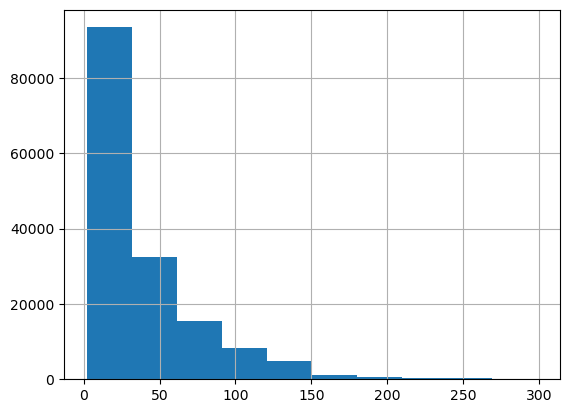

In [14]:
mind_interacts['impressions'].str.split().apply(len).hist()

In [15]:
len(mind_interacts)

156965

In [9]:
#mind_interacts['impressions'].str.split().explode().str.strip("-0").str.strip("-1").isin(mind_news["news_id"]).sum()

In [10]:
mind_interacts['user_id'].nunique()

50000

In [11]:
mind_interacts['history'] = mind_interacts['history'].str.split()

In [12]:
mind_interacts['impressions'] = mind_interacts['impressions'].str.split()

In [13]:
#mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [14]:
#mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [15]:
#mind_interacts['history'].explode().isin(mind_news['news_id'].unique())

In [16]:
#checks if belongs to news

In [17]:
#mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(list)

In [18]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()

/tmp/ipykernel_7197/3028116728.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()


1995560

In [19]:
#(mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()

In [20]:
#mind_interacts['history'].explode().loc[mind_interacts['history'].explode().isin(mind_news['news_id'].unique())].reset_index().groupby('index')["history"].apply(list)

In [21]:

idxs_articles_of_the_type = mind_interacts['history'].explode().isin(mind_news['news_id'].unique())
mind_interacts['filtered_history'] = mind_interacts['history'].explode().loc[idxs_articles_of_the_type].reset_index().groupby('index')["history"].apply(list)

<Axes: >

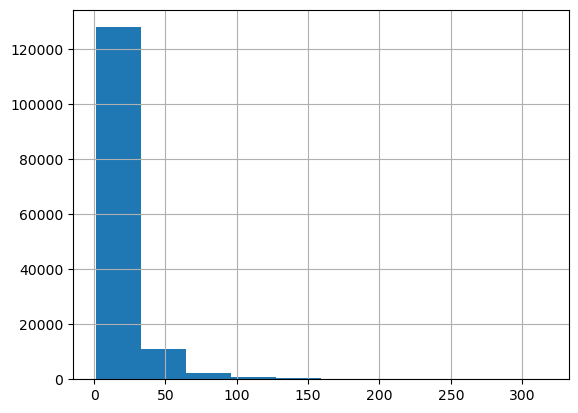

In [22]:
mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len).hist()

In [23]:
(mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len)>0).sum()

142904

In [24]:
mind_interacts.dropna(axis=0,subset=['filtered_history'],inplace=True)

In [25]:
train_mind = mind_interacts.explode('filtered_history').copy()

In [26]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
7,N59295,news,newsworld,Chile: Three die in supermarket fire amid prot...,Three people have died in a supermarket fire a...,https://assets.msn.com/labs/mind/AAJ43pw.html,"[{""Label"": ""Chile"", ""Type"": ""G"", ""WikidataId"":...","[{""Label"": ""Santiago"", ""Type"": ""G"", ""WikidataI..."
9,N39237,news,newsscienceandtechnology,"How to report weather-related closings, delays","When there are active closings, view them here...",https://assets.msn.com/labs/mind/AAlErhA.html,[],"[{""Label"": ""WXII-TV"", ""Type"": ""M"", ""WikidataId..."
20,N9786,news,newspolitics,Elijah Cummings to lie in state at US Capitol ...,"Cummings, a Democrat whose district included s...",https://assets.msn.com/labs/mind/AAJgNxm.html,"[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi..."
23,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,DOJ's Makan Delrahim and the FTC's Joe Simons ...,https://assets.msn.com/labs/mind/AACI1SK.html,"[{""Label"": ""Big Four tech companies"", ""Type"": ...","[{""Label"": ""Makan Delrahim"", ""Type"": ""P"", ""Wik..."


In [27]:
train_mind = train_mind.merge(mind_news,left_on="filtered_history",right_on="news_id")

In [28]:
train_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [29]:
mind_interacts['impression_news_id'] = mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [30]:
mind_interacts['impression_news_label'] = mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [31]:
test_mind = mind_interacts.explode(['impression_news_id','impression_news_label']).copy()

In [32]:
test_mind = test_mind.loc[test_mind['impression_news_id'].isin(mind_news["news_id"].unique())]

In [33]:
test_mind = test_mind.merge(mind_news,left_on="impression_news_id",right_on="news_id")

In [34]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]","[N45794, N19347, N31801]",N35729,0,N35729,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,https://assets.msn.com/labs/mind/BBWyjM9.html,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId..."
1,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N39317,0,N39317,news,newspolitics,"Senior Trump official embellished résumé, had ...",State Dept. official Mina Chang claimed to be ...,https://assets.msn.com/labs/mind/BBWEmIj.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ..."
2,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N20495,0,N20495,news,newscrime,Mother of missing Florida girl charged; human ...,Police searching for a 5-year-old Florida girl...,https://assets.msn.com/labs/mind/BBWEIZi.html,"[{""Label"": ""Florida"", ""Type"": ""G"", ""WikidataId...","[{""Label"": ""Alabama"", ""Type"": ""G"", ""WikidataId..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N42977,0,N42977,news,newsus,'It's not over': Sarah Palin says she is fight...,Former Alaska Gov. Sarah Palin said she learne...,https://assets.msn.com/labs/mind/BBWF2FT.html,"[{""Label"": ""Sarah Palin"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Sarah Palin"", ""Type"": ""P"", ""Wikida..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N22407,0,N22407,finance,markets,Wealthy investors are bracing for a sharp stoc...,More than half of the world's wealthiest inves...,https://assets.msn.com/labs/mind/BBWEQm9.html,[],"[{""Label"": ""UBS"", ""Type"": ""O"", ""WikidataId"": ""..."


In [35]:
len(test_mind)

1981827

In [36]:
test_mind = test_mind.explode(['filtered_history']).merge(mind_news,left_on="filtered_history",right_on="news_id")

In [37]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [38]:
res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [39]:
res.head()

text_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [The Porsche went airborne off a median in Tom...   
2             U91836  11/12/2019 6:11:30 PM N17059     [Dean Foods blamed a decadeslong drop in milk ...   
                                            N20495     [Police searching for a 5-year-old Florida gir...   
                                            N22407     [More than half of the world's wealthiest inve...   
                                            N39317     [State Dept. official Mina Chang claimed to be...   

                                                                                                 title_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Porsche launches into second story of New Jer...   
2             U91836  11/12/2019 6:11:30 PM N17059     [No. 1 milk company declares bankruptcy amid d...   
                                            N20495     [Mother of missing Florida girl charged; human...   
                                            N22407     [Wealthy investors are bracing for a sharp sto...   
                                            N39317     [Senior Trump official embellished résumé, had...   

                                                                                                  text_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four American Airlines flight attendants were...   
2             U91836  11/12/2019 6:11:30 PM N17059     [A woman arrested at O'Hare International Airp...   
                                            N20495     [A woman arrested at O'Hare International Airp...   
                                            N22407     [A woman arrested at O'Hare International Airp...   
                                            N39317     [A woman arrested at O'Hare International Airp...   

                                                                                                 title_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four flight attendants were arrested in Miami...   
2             U91836  11/12/2019 6:11:30 PM N17059     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N20495     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N22407     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N39317     ['Habitual stowaway' arrested again at O'Hare,...   

                                                                                             news_type_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                                    [news, news, news]   
2             U91836  11/12/2019 6:11:30 PM N17059     [finance, finance, finance, finance, finance, ...   
                                            N20495     [news, news, news, news, news, news, news, new...   
                                            N22407     [finance, finance, finance, finance, finance, ...   
                                            N39317     [news, news, news, news, news, news, news, new...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 

In [40]:
len(set(res['text_x'].iloc[0]))

1

In [41]:
len(res['text_x'].iloc[0])

3

In [42]:
res['text_x'] = res['text_x'].apply(lambda x: set(x).pop())
res['title_x'] = res['title_x'].apply(lambda x: set(x).pop())
res['impression_news_label'] = res['impression_news_label'].apply(lambda x: set(x).pop())
res['news_type_x'] = res['news_type_x'].apply(lambda x: set(x))

In [43]:
res.head()

text_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     The Porsche went airborne off a median in Toms...   
2             U91836  11/12/2019 6:11:30 PM N17059     Dean Foods blamed a decadeslong drop in milk c...   
                                            N20495     Police searching for a 5-year-old Florida girl...   
                                            N22407     More than half of the world's wealthiest inves...   
                                            N39317     State Dept. official Mina Chang claimed to be ...   

                                                                                                 title_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     Porsche launches into second story of New Jers...   
2             U91836  11/12/2019 6:11:30 PM N17059     No. 1 milk company declares bankruptcy amid dr...   
                                            N20495     Mother of missing Florida girl charged; human ...   
                                            N22407     Wealthy investors are bracing for a sharp stoc...   
                                            N39317     Senior Trump official embellished résumé, had ...   

                                                                                                  text_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four American Airlines flight attendants were...   
2             U91836  11/12/2019 6:11:30 PM N17059     [A woman arrested at O'Hare International Airp...   
                                            N20495     [A woman arrested at O'Hare International Airp...   
                                            N22407     [A woman arrested at O'Hare International Airp...   
                                            N39317     [A woman arrested at O'Hare International Airp...   

                                                                                                 title_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four flight attendants were arrested in Miami...   
2             U91836  11/12/2019 6:11:30 PM N17059     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N20495     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N22407     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N39317     ['Habitual stowaway' arrested again at O'Hare,...   

                                                      news_type_x  \
impression_id user_id time                  news_id_x               
1             U13740  11/11/2019 9:05:58 AM N35729         {news}   
2             U91836  11/12/2019 6:11:30 PM N17059      {finance}   
                                            N20495         {news}   
                                            N22407      {finance}   
                                            N39317         {news}   

                                                      impression_news_label  
impression_id user_id time                  news_id_x                        
1             U13740  11/11/2019 9:05:58 AM N35729                        0  
2             U91836  11/12/2019 6:11:30 PM N17059                        1  
                                            N20495                        0  
                                            N22407                        0  
                                            N39317                        0

In [44]:
res = res.rename({'text_x':'text_candidate','title_x':'title_candidate','text_y':'text_history','title_y':'title_history','news_type_x':'candidate_news_type'},axis=1)

In [ ]:
res.to_pickle('data/mind_preprocessed_history_and_candidate_v1.pkl')

In [45]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [46]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [47]:
res2 = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['news_id_y','impression_news_id','impression_news_label']].aggregate(list)

In [48]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                                                      impression_news_id  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N35729, N35729, N35729]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N17059, N17059, N17059, N17059, N17059, N1705...   
                                            N20495     [N20495, N20495, N20495, N20495, N20495, N2049...   
                                            N22407     [N22407, N22407, N22407, N22407, N22407, N2240...   
                                            N39317     [N39317, N39317, N39317, N39317, N39317, N3931...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 0, 0]  
2             U91836  11/12/2019 6:11:30 PM N17059     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
                                            N20495     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N22407     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N39317     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [49]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                                                      impression_news_id  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N35729, N35729, N35729]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N17059, N17059, N17059, N17059, N17059, N1705...   
                                            N20495     [N20495, N20495, N20495, N20495, N20495, N2049...   
                                            N22407     [N22407, N22407, N22407, N22407, N22407, N2240...   
                                            N39317     [N39317, N39317, N39317, N39317, N39317, N3931...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 0, 0]  
2             U91836  11/12/2019 6:11:30 PM N17059     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
                                            N20495     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N22407     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N39317     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [50]:
res2['history'] = res2['news_id_y']
#res2['text_x'] = res2['text_x'].apply(lambda x: set(x).pop())
res2['impression_news_id'] = res2['impression_news_id'].apply(lambda x: set(x).pop())
res2['impression_news_label'] = res2['impression_news_label'].apply(lambda x: set(x).pop())


In [51]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                      impression_news_id  \
impression_id user_id time                  news_id_x                      
1             U13740  11/11/2019 9:05:58 AM N35729                N35729   
2             U91836  11/12/2019 6:11:30 PM N17059                N17059   
                                            N20495                N20495   
                                            N22407                N22407   
                                            N39317                N39317   

                                                      impression_news_label  \
impression_id user_id time                  news_id_x                         
1             U13740  11/11/2019 9:05:58 AM N35729                        0   
2             U91836  11/12/2019 6:11:30 PM N17059                        1   
                                            N20495                        0   
                                            N22407                        0   
                                            N39317                        0   

                                                                                                 history  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]  
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...

In [52]:
res2["impression"] = res2["impression_news_id"].astype(str)+"-"+res2["impression_news_label"].astype(str)

In [53]:
res3 = res2.groupby(['impression_id','user_id','time'])[['history','impression']].aggregate(list)

In [54]:
res3.head()

,,,history,impression
impression_id,user_id,time,,
1,U13740,11/11/2019 9:05:58 AM,"[[N45794, N19347, N31801]]",[N35729-0]
2,U91836,11/12/2019 6:11:30 PM,"[[N31739, N6072, N63045, N23979, N43353, N8129...","[N17059-1, N20495-0, N22407-0, N39317-0, N4297..."
3,U73700,11/14/2019 7:01:48 AM,"[[N7563, N47289, N24233], [N7563, N47289, N242...","[N12330-0, N23877-0, N29739-0, N35389-0, N3622..."
4,U34670,11/11/2019 5:28:05 AM,"[[N53880, N41375], [N53880, N41375]]","[N27581-0, N35729-0]"
6,U19739,11/11/2019 6:52:13 PM,"[[N14343, N32607, N32320, N22007, N24294, N827...","[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]"


In [55]:
res3['impressions'] =res3['impression'].apply(lambda x: " ".join(x))

In [56]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U13740,11/11/2019 9:05:58 AM,"[[N45794, N19347, N31801]]",[N35729-0],N35729-0
2,U91836,11/12/2019 6:11:30 PM,"[[N31739, N6072, N63045, N23979, N43353, N8129...","[N17059-1, N20495-0, N22407-0, N39317-0, N4297...",N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
3,U73700,11/14/2019 7:01:48 AM,"[[N7563, N47289, N24233], [N7563, N47289, N242...","[N12330-0, N23877-0, N29739-0, N35389-0, N3622...",N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
4,U34670,11/11/2019 5:28:05 AM,"[[N53880, N41375], [N53880, N41375]]","[N27581-0, N35729-0]",N27581-0 N35729-0
6,U19739,11/11/2019 6:52:13 PM,"[[N14343, N32607, N32320, N22007, N24294, N827...","[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]",N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [57]:
res3['history'] = res3['history'].apply(lambda x: x[0])

In [58]:
res3['history'] = res3['history'].apply(lambda x: " ".join(x))

In [59]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,[N35729-0],N35729-0
2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,"[N17059-1, N20495-0, N22407-0, N39317-0, N4297...",N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,"[N12330-0, N23877-0, N29739-0, N35389-0, N3622...",N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,"[N27581-0, N35729-0]",N27581-0 N35729-0
6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,"[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]",N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [60]:
res3.columns

Index(['history', 'impression', 'impressions'], dtype='object')

In [61]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/trial',sep='\t',index=False,header=False)

In [62]:
trial = pd.read_table('data/trial')

In [63]:
trial.head()

,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
0,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
1,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
2,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
3,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
4,7,U8355,11/11/2019 12:22:09 PM,N8419 N1431 N18663 N32095 N55310 N31931 N42526...,N10688-0 N12028-0 N12280-0 N15132-0 N15260-0 N...


In [64]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/large_filtered_behaviors_train.tsv',sep='\t',index=False,header=False)

In [1]:
import pandas as pd

In [2]:
mind_news = pd.read_table('data/MINDlarge_dev/news.tsv',header=None,
                          names=['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [3]:
#mind_news.colums.rename( ['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [4]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
3,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
4,N75236,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."


In [5]:
mind_news = mind_news.loc[mind_news["news_type"].isin(['news','finance'])]

In [6]:
mind_interacts = pd.read_table('data/MINDlarge_dev/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [7]:
mind_interacts.head()

,impression_id,user_id,time,history,impressions
0,1,U134050,11/15/2019 8:55:22 AM,N12246 N128820 N119226 N4065 N67770 N33446 N10...,N91737-0 N30206-0 N54368-0 N117802-0 N18190-0 ...
1,2,U254959,11/15/2019 11:42:35 AM,N34011 N9375 N67397 N7936 N118985 N109453 N103...,N119999-0 N24958-0 N104054-0 N33901-0 N9250-0 ...
2,3,U499841,11/15/2019 9:08:21 AM,N63858 N26834 N6379 N85484 N15229 N65119 N1047...,N18190-0 N89764-0 N91737-0 N54368-0 N49978-1 N...
3,4,U107107,11/15/2019 5:50:31 AM,N12959 N8085 N18389 N3758 N9740 N90543 N129790...,N122944-1 N18190-0 N55801-0 N59297-0 N128045-0...
4,5,U492344,11/15/2019 5:02:25 AM,N109183 N48453 N85005 N45706 N98923 N46069 N35...,N64785-0 N82503-0 N32993-0 N122944-0 N29160-0 ...


<Axes: >

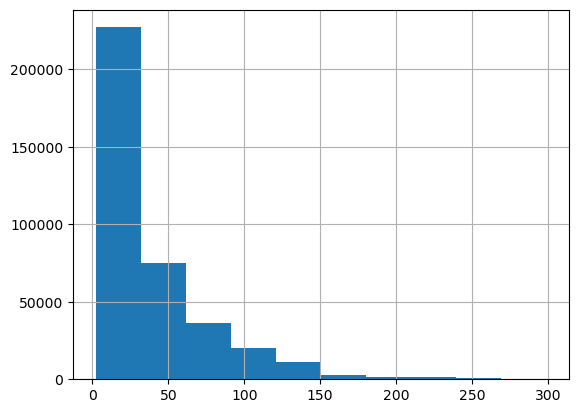

In [8]:
mind_interacts['impressions'].str.split().apply(len).hist()

In [9]:
len(mind_interacts)

376471

In [10]:
mind_interacts['impressions'].str.split().explode().str.strip("-0").str.strip("-1").isin(mind_news["news_id"]).sum()

4330753

In [11]:
mind_interacts['user_id'].nunique()

255990

In [12]:
mind_interacts['history'] = mind_interacts['history'].str.split()

In [13]:
mind_interacts['impressions'] = mind_interacts['impressions'].str.split()

In [14]:
mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

0         [N91737, N30206, N54368, N117802, N18190, N122...
1         [N119999, N24958, N104054, N33901, N9250, N333...
2         [N18190, N89764, N91737, N54368, N49978, N2916...
3         [N122944, N18190, N55801, N59297, N128045, N29...
4         [N64785, N82503, N32993, N122944, N29160, N628...
                                ...                        
376466                    [N122640, N29160, N54368, N18190]
376467    [N122640, N18190, N55801, N69938, N12384, N291...
376468    [N46555, N28863, N129416, N112536, N64957, N21...
376469    [N56784, N28863, N26553, N2110, N99846, N19831...
376470    [N28962, N52388, N128045, N17804, N15424, N874...
Name: impressions, Length: 376471, dtype: object

In [15]:
mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

0          [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2                                  [0, 0, 0, 0, 1, 0, 0, 0]
3                            [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
4         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                ...                        
376466                                         [0, 0, 1, 0]
376467                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
376468                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
376469    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
376470    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: impressions, Length: 376471, dtype: object

In [16]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique())

0         False
0         False
0          True
0         False
0         False
          ...  
376470     True
376470    False
376470     True
376470     True
376470    False
Name: history, Length: 12293433, dtype: bool

In [17]:
#checks if belongs to news

In [18]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(list)

index
0         [False, False, True, False, False, False, True...
1         [False, False, False, True, False, True, False...
2         [False, False, False, False, False, True, True...
3         [False, False, False, False, True, True, False...
4         [True, False, True, True, False, False, True, ...
                                ...                        
376466            [False, False, False, False, True, False]
376467    [True, True, True, False, False, False, False,...
376468    [False, True, False, False, False, False, True...
376469    [True, False, False, False, True, False, False...
376470    [False, True, True, True, True, False, True, T...
Name: history, Length: 376471, dtype: object

In [19]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()

/tmp/ipykernel_1787444/3028116728.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()


4636022

In [20]:
(mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()

/tmp/ipykernel_1787444/3688834197.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  (mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()


338199

In [21]:
mind_interacts['history'].explode().loc[mind_interacts['history'].explode().isin(mind_news['news_id'].unique())].reset_index().groupby('index')["history"].apply(list)

index
0         [N119226, N103285, N98680, N30276, N48804, N79...
1         [N7936, N109453, N116768, N89398, N68431, N129...
2         [N65119, N104760, N67169, N46841, N90966, N56099]
3         [N9740, N90543, N7936, N68249, N109183, N10235...
4         [N109183, N85005, N45706, N35926, N61138, N957...
                                ...                        
376466                                             [N96616]
376467    [N31305, N7742, N45909, N87749, N127337, N5661...
376468    [N104081, N26206, N76970, N49347, N80126, N114...
376469    [N51171, N32534, N29748, N30939, N110232, N446...
376470     [N82746, N16614, N18966, N36243, N74723, N33735]
Name: history, Length: 338199, dtype: object

In [22]:

idxs_articles_of_the_type = mind_interacts['history'].explode().isin(mind_news['news_id'].unique())
mind_interacts['filtered_history'] = mind_interacts['history'].explode().loc[idxs_articles_of_the_type].reset_index().groupby('index')["history"].apply(list)

<Axes: >

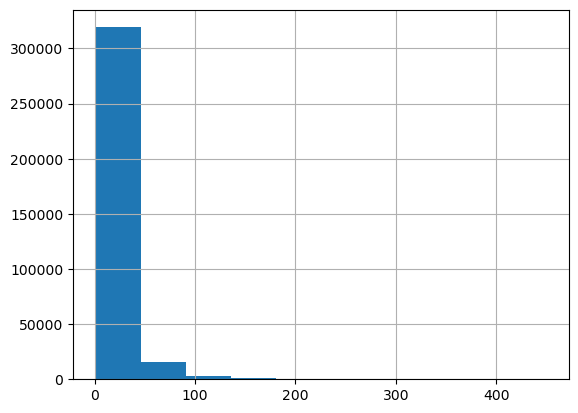

In [23]:
mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len).hist()

In [24]:
(mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len)>0).sum()

338199

In [25]:
mind_interacts.dropna(axis=0,subset=['filtered_history'],inplace=True)

In [26]:
train_mind = mind_interacts.explode('filtered_history').copy()

In [27]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
3,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
8,N51947,news,newsscienceandtechnology,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...,https://assets.msn.com/labs/mind/AADlomf.html,"[{""Label"": ""Microsoft Windows"", ""Type"": ""J"", ""...",[]
11,N40259,news,newsworld,Chile: Three die in supermarket fire amid prot...,Three people have died in a supermarket fire a...,https://assets.msn.com/labs/mind/AAJ43pw.html,"[{""Label"": ""Chile"", ""Type"": ""G"", ""WikidataId"":...","[{""Label"": ""Santiago"", ""Type"": ""G"", ""WikidataI..."
26,N21935,news,newspolitics,Elijah Cummings to lie in state at US Capitol ...,"Cummings, a Democrat whose district included s...",https://assets.msn.com/labs/mind/AAJgNxm.html,"[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi..."
31,N81055,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,DOJ's Makan Delrahim and the FTC's Joe Simons ...,https://assets.msn.com/labs/mind/AACI1SK.html,"[{""Label"": ""Big Four tech companies"", ""Type"": ...","[{""Label"": ""Makan Delrahim"", ""Type"": ""P"", ""Wik..."


In [28]:
train_mind = train_mind.merge(mind_news,left_on="filtered_history",right_on="news_id")

In [29]:
train_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N119226,N119226,news,newspolitics,'Crazy' Dems consumed by 'hateful spirit' purs...,President Donald Trump spoke at the Values Vot...,https://assets.msn.com/labs/mind/AAIGPyD.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
1,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N103285,N103285,news,newsus,She's 83 and might get kicked out of her apart...,Elsie Cruey moved into a Fairfax apartment com...,https://assets.msn.com/labs/mind/AAISSsC.html,[],[]
2,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N98680,N98680,news,newsus,"Trump's claim he boosted incomes by $7,000 dif...",President Donald Trump boasted on Monday that ...,https://assets.msn.com/labs/mind/AAJdodw.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
3,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N30276,N30276,news,newspolitics,Trump blasts 'Never Trump' Republicans as 'hum...,President Trump on Wednesday excoriated so-cal...,https://assets.msn.com/labs/mind/AAJezDv.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
4,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N48804,N48804,news,newspolitics,Giuliani Is Drawing Attention to Hunter Biden'...,"Rudolph W. Giuliani, President Trump's persona...",https://assets.msn.com/labs/mind/AAJmY9s.html,"[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid..."


In [30]:
mind_interacts['impression_news_id'] = mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [31]:
mind_interacts['impression_news_label'] = mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [32]:
test_mind = mind_interacts.explode(['impression_news_id','impression_news_label']).copy()

In [33]:
test_mind = test_mind.loc[test_mind['impression_news_id'].isin(mind_news["news_id"].unique())]

In [34]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N54368,0
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N18356,0
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N58465,0
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N35304,0
1,2,U254959,11/15/2019 11:42:35 AM,"[N34011, N9375, N67397, N7936, N118985, N10945...","[N119999-0, N24958-0, N104054-0, N33901-0, N92...","[N7936, N109453, N116768, N89398, N68431, N129...",N104054,0


In [35]:
test_mind = test_mind.merge(mind_news,left_on="impression_news_id",right_on="news_id")

In [36]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N54368,0,N54368,news,newsus,South Carolina teen gets life in prison for de...,"Jesse Osborne, the teenager responsible for a ...",https://assets.msn.com/labs/mind/BBWMe6C.html,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti..."
1,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N18356,0,N18356,finance,finance-companies,The world's most profitable company is about t...,The oil company that made Saudi Arabia rich is...,https://assets.msn.com/labs/mind/BBWOqVG.html,[],"[{""Label"": ""Saudi Arabia"", ""Type"": ""G"", ""Wikid..."
2,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N58465,0,N58465,finance,finance-retirement,Supporting your adult children can ruin your r...,Prepare your children early in life to be fina...,https://assets.msn.com/labs/mind/BBWODmf.html,[],[]
3,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...","[N119226, N103285, N98680, N30276, N48804, N79...",N35304,0,N35304,finance,finance-taxes,Raise Billions From Billionaires? Tax Experts ...,One of the signature initiatives of Elizabeth ...,https://assets.msn.com/labs/mind/BBWOhDw.html,[],"[{""Label"": ""Elizabeth Warren"", ""Type"": ""P"", ""W..."
4,2,U254959,11/15/2019 11:42:35 AM,"[N34011, N9375, N67397, N7936, N118985, N10945...","[N119999-0, N24958-0, N104054-0, N33901-0, N92...","[N7936, N109453, N116768, N89398, N68431, N129...",N104054,0,N104054,news,newscrime,Stephanie Parze's Car Is at Home. So Is Her Ph...,Her car was in the driveway. Her phone was on ...,https://assets.msn.com/labs/mind/BBWLQPc.html,[],"[{""Label"": ""New Jersey"", ""Type"": ""G"", ""Wikidat..."


In [37]:
len(test_mind)

4019658

In [38]:
test_mind = test_mind.explode(['filtered_history']).merge(mind_news,left_on="filtered_history",right_on="news_id")

In [39]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N119226,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N119226,news,newspolitics,'Crazy' Dems consumed by 'hateful spirit' purs...,President Donald Trump spoke at the Values Vot...,https://assets.msn.com/labs/mind/AAIGPyD.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
1,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N103285,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N103285,news,newsus,She's 83 and might get kicked out of her apart...,Elsie Cruey moved into a Fairfax apartment com...,https://assets.msn.com/labs/mind/AAISSsC.html,[],[]
2,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N98680,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N98680,news,newsus,"Trump's claim he boosted incomes by $7,000 dif...",President Donald Trump boasted on Monday that ...,https://assets.msn.com/labs/mind/AAJdodw.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
3,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N30276,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N30276,news,newspolitics,Trump blasts 'Never Trump' Republicans as 'hum...,President Trump on Wednesday excoriated so-cal...,https://assets.msn.com/labs/mind/AAJezDv.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
4,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N48804,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N48804,news,newspolitics,Giuliani Is Drawing Attention to Hunter Biden'...,"Rudolph W. Giuliani, President Trump's persona...",https://assets.msn.com/labs/mind/AAJmY9s.html,"[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid..."


In [40]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [41]:
#res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [42]:
res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [43]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [The oil company that made Saudi Arabia rich i...   
                                             N35304     [One of the signature initiatives of Elizabeth...   
                                             N54368     [Jesse Osborne, the teenager responsible for a...   
                                             N58465     [Prepare your children early in life to be fin...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Two students were killed and three other teen...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [The world's most profitable company is about ...   
                                             N35304     [Raise Billions From Billionaires? Tax Experts...   
                                             N54368     [South Carolina teen gets life in prison for d...   
                                             N58465     [Supporting your adult children can ruin your ...   
2             U254959 11/15/2019 11:42:35 AM N103830    [A 16-second spasm of violence leaves 2 dead a...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [President Donald Trump spoke at the Values Vo...   
                                             N35304     [President Donald Trump spoke at the Values Vo...   
                                             N54368     [President Donald Trump spoke at the Values Vo...   
                                             N58465     [President Donald Trump spoke at the Values Vo...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Cody Gregg was arrested after police stopped ...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N35304     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N54368     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N58465     ['Crazy' Dems consumed by 'hateful spirit' pur...   
2             U254959 11/15/2019 11:42:35 AM N103830    [He pleaded guilty to cocaine possession and w...   

                                                                                              news_type_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [finance, finance, finance, finance, finance, ...   
                                             N35304     [finance, finance, finance, finance, finance, ...   
                                             N54368     [news, news, news, news, news, news, news, new...   
                                             N58465     [finance, finance, finance, finance, finance, ...   
2             U254959 11/15/2019 11:42:35 AM N103830    [news, news, news, news, news, news, news, new...   

                                                                                    impression_news_label  
impression_id user_id time                   news_id_x                                                     
1             U134050 11/15/2019 8:55:22 AM  N18356            

In [44]:
len(set(res['text_x'].iloc[0]))

1

In [45]:
len(res['text_x'].iloc[0])

9

In [46]:
len(set(res['text_x'].iloc[0]))

1

In [47]:
len(res['text_x'].iloc[0])

9

In [48]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [The oil company that made Saudi Arabia rich i...   
                                             N35304     [One of the signature initiatives of Elizabeth...   
                                             N54368     [Jesse Osborne, the teenager responsible for a...   
                                             N58465     [Prepare your children early in life to be fin...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Two students were killed and three other teen...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [The world's most profitable company is about ...   
                                             N35304     [Raise Billions From Billionaires? Tax Experts...   
                                             N54368     [South Carolina teen gets life in prison for d...   
                                             N58465     [Supporting your adult children can ruin your ...   
2             U254959 11/15/2019 11:42:35 AM N103830    [A 16-second spasm of violence leaves 2 dead a...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [President Donald Trump spoke at the Values Vo...   
                                             N35304     [President Donald Trump spoke at the Values Vo...   
                                             N54368     [President Donald Trump spoke at the Values Vo...   
                                             N58465     [President Donald Trump spoke at the Values Vo...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Cody Gregg was arrested after police stopped ...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N35304     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N54368     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N58465     ['Crazy' Dems consumed by 'hateful spirit' pur...   
2             U254959 11/15/2019 11:42:35 AM N103830    [He pleaded guilty to cocaine possession and w...   

                                                                                              news_type_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [finance, finance, finance, finance, finance, ...   
                                             N35304     [finance, finance, finance, finance, finance, ...   
                                             N54368     [news, news, news, news, news, news, news, new...   
                                             N58465     [finance, finance, finance, finance, finance, ...   
2             U254959 11/15/2019 11:42:35 AM N103830    [news, news, news, news, news, news, news, new...   

                                                                                    impression_news_label  
impression_id user_id time                   news_id_x                                                     
1             U134050 11/15/2019 8:55:22 AM  N18356            

In [49]:
res['text_x'] = res['text_x'].apply(lambda x: set(x).pop())
res['title_x'] = res['title_x'].apply(lambda x: set(x).pop())
res['impression_news_label'] = res['impression_news_label'].apply(lambda x: set(x).pop())
res['news_type_x'] = res['news_type_x'].apply(lambda x: set(x))

In [50]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     The oil company that made Saudi Arabia rich is...   
                                             N35304     One of the signature initiatives of Elizabeth ...   
                                             N54368     Jesse Osborne, the teenager responsible for a ...   
                                             N58465     Prepare your children early in life to be fina...   
2             U254959 11/15/2019 11:42:35 AM N103830    Two students were killed and three other teens...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     The world's most profitable company is about t...   
                                             N35304     Raise Billions From Billionaires? Tax Experts ...   
                                             N54368     South Carolina teen gets life in prison for de...   
                                             N58465     Supporting your adult children can ruin your r...   
2             U254959 11/15/2019 11:42:35 AM N103830    A 16-second spasm of violence leaves 2 dead at...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [President Donald Trump spoke at the Values Vo...   
                                             N35304     [President Donald Trump spoke at the Values Vo...   
                                             N54368     [President Donald Trump spoke at the Values Vo...   
                                             N58465     [President Donald Trump spoke at the Values Vo...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Cody Gregg was arrested after police stopped ...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N35304     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N54368     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N58465     ['Crazy' Dems consumed by 'hateful spirit' pur...   
2             U254959 11/15/2019 11:42:35 AM N103830    [He pleaded guilty to cocaine possession and w...   

                                                       news_type_x  \
impression_id user_id time                   news_id_x               
1             U134050 11/15/2019 8:55:22 AM  N18356      {finance}   
                                             N35304      {finance}   
                                             N54368         {news}   
                                             N58465      {finance}   
2             U254959 11/15/2019 11:42:35 AM N103830        {news}   

                                                       impression_news_label  
impression_id user_id time                   news_id_x                        
1             U134050 11/15/2019 8:55:22 AM  N18356                        0  
                                             N35304                        0  
                                             N54368                        0  
                                             N58465                        0  
2             U254959 11/15/2019 11:42:35 AM N103830                       0

In [51]:
res = res.rename({'text_x':'text_candidate','title_x':'title_candidate','text_y':'text_history','title_y':'title_history','news_type_x':'candidate_news_type'},axis=1)

In [52]:
res.to_pickle('data/mind_large_val_preprocessed_history_and_candidate_v1.pkl')

In [53]:
res.head()

text_candidate  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     The oil company that made Saudi Arabia rich is...   
                                             N35304     One of the signature initiatives of Elizabeth ...   
                                             N54368     Jesse Osborne, the teenager responsible for a ...   
                                             N58465     Prepare your children early in life to be fina...   
2             U254959 11/15/2019 11:42:35 AM N103830    Two students were killed and three other teens...   

                                                                                          title_candidate  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     The world's most profitable company is about t...   
                                             N35304     Raise Billions From Billionaires? Tax Experts ...   
                                             N54368     South Carolina teen gets life in prison for de...   
                                             N58465     Supporting your adult children can ruin your r...   
2             U254959 11/15/2019 11:42:35 AM N103830    A 16-second spasm of violence leaves 2 dead at...   

                                                                                             text_history  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [President Donald Trump spoke at the Values Vo...   
                                             N35304     [President Donald Trump spoke at the Values Vo...   
                                             N54368     [President Donald Trump spoke at the Values Vo...   
                                             N58465     [President Donald Trump spoke at the Values Vo...   
2             U254959 11/15/2019 11:42:35 AM N103830    [Cody Gregg was arrested after police stopped ...   

                                                                                            title_history  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N35304     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N54368     ['Crazy' Dems consumed by 'hateful spirit' pur...   
                                             N58465     ['Crazy' Dems consumed by 'hateful spirit' pur...   
2             U254959 11/15/2019 11:42:35 AM N103830    [He pleaded guilty to cocaine possession and w...   

                                                       candidate_news_type  \
impression_id user_id time                   news_id_x                       
1             U134050 11/15/2019 8:55:22 AM  N18356              {finance}   
                                             N35304              {finance}   
                                             N54368                 {news}   
                                             N58465              {finance}   
2             U254959 11/15/2019 11:42:35 AM N103830                {news}   

                                                       impression_news_label  
impression_id user_id time                   news_id_x                        
1             U134050 11/15/2019 8:55:22 AM  N18356                        0  
                                             N35304                        0  
                                             N54368                        0  
                                             N58465                        0  
2             

In [54]:
1

1

In [55]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N119226,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N119226,news,newspolitics,'Crazy' Dems consumed by 'hateful spirit' purs...,President Donald Trump spoke at the Values Vot...,https://assets.msn.com/labs/mind/AAIGPyD.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
1,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N103285,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N103285,news,newsus,She's 83 and might get kicked out of her apart...,Elsie Cruey moved into a Fairfax apartment com...,https://assets.msn.com/labs/mind/AAISSsC.html,[],[]
2,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N98680,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N98680,news,newsus,"Trump's claim he boosted incomes by $7,000 dif...",President Donald Trump boasted on Monday that ...,https://assets.msn.com/labs/mind/AAJdodw.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
3,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N30276,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N30276,news,newspolitics,Trump blasts 'Never Trump' Republicans as 'hum...,President Trump on Wednesday excoriated so-cal...,https://assets.msn.com/labs/mind/AAJezDv.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
4,1,U134050,11/15/2019 8:55:22 AM,"[N12246, N128820, N119226, N4065, N67770, N334...","[N91737-0, N30206-0, N54368-0, N117802-0, N181...",N48804,N54368,0,N54368,news,...,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti...",N48804,news,newspolitics,Giuliani Is Drawing Attention to Hunter Biden'...,"Rudolph W. Giuliani, President Trump's persona...",https://assets.msn.com/labs/mind/AAJmY9s.html,"[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Hunter Biden"", ""Type"": ""P"", ""Wikid..."


In [56]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [57]:
res2 = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['news_id_y','impression_news_id','impression_news_label']].aggregate(list)

In [58]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N35304     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N54368     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N58465     [N119226, N103285, N98680, N30276, N48804, N79...   
2             U254959 11/15/2019 11:42:35 AM N103830    [N7936, N109453, N116768, N89398, N68431, N129...   

                                                                                       impression_news_id  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [N18356, N18356, N18356, N18356, N18356, N1835...   
                                             N35304     [N35304, N35304, N35304, N35304, N35304, N3530...   
                                             N54368     [N54368, N54368, N54368, N54368, N54368, N5436...   
                                             N58465     [N58465, N58465, N58465, N58465, N58465, N5846...   
2             U254959 11/15/2019 11:42:35 AM N103830    [N103830, N103830, N103830, N103830, N103830, ...   

                                                                                    impression_news_label  
impression_id user_id time                   news_id_x                                                     
1             U134050 11/15/2019 8:55:22 AM  N18356                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N35304                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N54368                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N58465                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
2             U254959 11/15/2019 11:42:35 AM N103830    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [59]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N35304     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N54368     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N58465     [N119226, N103285, N98680, N30276, N48804, N79...   
2             U254959 11/15/2019 11:42:35 AM N103830    [N7936, N109453, N116768, N89398, N68431, N129...   

                                                                                       impression_news_id  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [N18356, N18356, N18356, N18356, N18356, N1835...   
                                             N35304     [N35304, N35304, N35304, N35304, N35304, N3530...   
                                             N54368     [N54368, N54368, N54368, N54368, N54368, N5436...   
                                             N58465     [N58465, N58465, N58465, N58465, N58465, N5846...   
2             U254959 11/15/2019 11:42:35 AM N103830    [N103830, N103830, N103830, N103830, N103830, ...   

                                                                                    impression_news_label  
impression_id user_id time                   news_id_x                                                     
1             U134050 11/15/2019 8:55:22 AM  N18356                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N35304                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N54368                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
                                             N58465                           [0, 0, 0, 0, 0, 0, 0, 0, 0]  
2             U254959 11/15/2019 11:42:35 AM N103830    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [60]:
res2['history'] = res2['news_id_y']
#res2['text_x'] = res2['text_x'].apply(lambda x: set(x).pop())
res2['impression_news_id'] = res2['impression_news_id'].apply(lambda x: set(x).pop())
res2['impression_news_label'] = res2['impression_news_label'].apply(lambda x: set(x).pop())


In [61]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U134050 11/15/2019 8:55:22 AM  N18356     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N35304     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N54368     [N119226, N103285, N98680, N30276, N48804, N79...   
                                             N58465     [N119226, N103285, N98680, N30276, N48804, N79...   
2             U254959 11/15/2019 11:42:35 AM N103830    [N7936, N109453, N116768, N89398, N68431, N129...   

                                                       impression_news_id  \
impression_id user_id time                   news_id_x                      
1             U134050 11/15/2019 8:55:22 AM  N18356                N18356   
                                             N35304                N35304   
                                             N54368                N54368   
                                             N58465                N58465   
2             U254959 11/15/2019 11:42:35 AM N103830              N103830   

                                                       impression_news_label  \
impression_id user_id time                   news_id_x                         
1             U134050 11/15/2019 8:55:22 AM  N18356                        0   
                                             N35304                        0   
                                             N54368                        0   
                                             N58465                        0   
2             U254959 11/15/2019 11:42:35 AM N103830                       0   

                                                                                                  history  
impression_id user_id time                   news_id_x                                                     
1             U134050 11/15/2019 8:55:22 AM  N18356     [N119226, N103285, N98680, N30276, N48804, N79...  
                                             N35304     [N119226, N103285, N98680, N30276, N48804, N79...  
                                             N54368     [N119226, N103285, N98680, N30276, N48804, N79...  
                                             N58465     [N119226, N103285, N98680, N30276, N48804, N79...  
2             U254959 11/15/2019 11:42:35 AM N103830    [N7936, N109453, N116768, N89398, N68431, N129...

In [62]:
res2["impression"] = res2["impression_news_id"].astype(str)+"-"+res2["impression_news_label"].astype(str)

In [63]:
res3 = res2.groupby(['impression_id','user_id','time'])[['history','impression']].aggregate(list)

In [64]:
res3.head()

,,,history,impression
impression_id,user_id,time,,
1,U134050,11/15/2019 8:55:22 AM,"[[N119226, N103285, N98680, N30276, N48804, N7...","[N18356-0, N35304-0, N54368-0, N58465-0]"
2,U254959,11/15/2019 11:42:35 AM,"[[N7936, N109453, N116768, N89398, N68431, N12...","[N103830-0, N104054-0, N10516-0, N105956-1, N1..."
3,U499841,11/15/2019 9:08:21 AM,"[[N65119, N104760, N67169, N46841, N90966, N56...",[N54368-0]
4,U107107,11/15/2019 5:50:31 AM,"[[N9740, N90543, N7936, N68249, N109183, N1023...","[N104644-0, N54368-1]"
5,U492344,11/15/2019 5:02:25 AM,"[[N109183, N85005, N45706, N35926, N61138, N95...","[N104054-0, N104644-0, N106619-0, N14612-0, N1..."


In [65]:
res3['impressions'] =res3['impression'].apply(lambda x: " ".join(x))

In [66]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U134050,11/15/2019 8:55:22 AM,"[[N119226, N103285, N98680, N30276, N48804, N7...","[N18356-0, N35304-0, N54368-0, N58465-0]",N18356-0 N35304-0 N54368-0 N58465-0
2,U254959,11/15/2019 11:42:35 AM,"[[N7936, N109453, N116768, N89398, N68431, N12...","[N103830-0, N104054-0, N10516-0, N105956-1, N1...",N103830-0 N104054-0 N10516-0 N105956-1 N108805...
3,U499841,11/15/2019 9:08:21 AM,"[[N65119, N104760, N67169, N46841, N90966, N56...",[N54368-0],N54368-0
4,U107107,11/15/2019 5:50:31 AM,"[[N9740, N90543, N7936, N68249, N109183, N1023...","[N104644-0, N54368-1]",N104644-0 N54368-1
5,U492344,11/15/2019 5:02:25 AM,"[[N109183, N85005, N45706, N35926, N61138, N95...","[N104054-0, N104644-0, N106619-0, N14612-0, N1...",N104054-0 N104644-0 N106619-0 N14612-0 N18258-...


In [67]:
res3['history'] = res3['history'].apply(lambda x: x[0])

In [68]:
res3['history'] = res3['history'].apply(lambda x: " ".join(x))

In [69]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U134050,11/15/2019 8:55:22 AM,N119226 N103285 N98680 N30276 N48804 N79909 N1...,"[N18356-0, N35304-0, N54368-0, N58465-0]",N18356-0 N35304-0 N54368-0 N58465-0
2,U254959,11/15/2019 11:42:35 AM,N7936 N109453 N116768 N89398 N68431 N129836 N8...,"[N103830-0, N104054-0, N10516-0, N105956-1, N1...",N103830-0 N104054-0 N10516-0 N105956-1 N108805...
3,U499841,11/15/2019 9:08:21 AM,N65119 N104760 N67169 N46841 N90966 N56099,[N54368-0],N54368-0
4,U107107,11/15/2019 5:50:31 AM,N9740 N90543 N7936 N68249 N109183 N102357 N340...,"[N104644-0, N54368-1]",N104644-0 N54368-1
5,U492344,11/15/2019 5:02:25 AM,N109183 N85005 N45706 N35926 N61138 N95732 N10...,"[N104054-0, N104644-0, N106619-0, N14612-0, N1...",N104054-0 N104644-0 N106619-0 N14612-0 N18258-...


In [70]:
res3.columns

Index(['history', 'impression', 'impressions'], dtype='object')

In [71]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/trial',sep='\t',index=False,header=False)

In [72]:
trial = pd.read_table('data/trial')

In [73]:
trial.head()

,1,U134050,11/15/2019 8:55:22 AM,N119226 N103285 N98680 N30276 N48804 N79909 N102447 N59416 N20285,N18356-0 N35304-0 N54368-0 N58465-0
0,2,U254959,11/15/2019 11:42:35 AM,N7936 N109453 N116768 N89398 N68431 N129836 N8...,N103830-0 N104054-0 N10516-0 N105956-1 N108805...
1,3,U499841,11/15/2019 9:08:21 AM,N65119 N104760 N67169 N46841 N90966 N56099,N54368-0
2,4,U107107,11/15/2019 5:50:31 AM,N9740 N90543 N7936 N68249 N109183 N102357 N340...,N104644-0 N54368-1
3,5,U492344,11/15/2019 5:02:25 AM,N109183 N85005 N45706 N35926 N61138 N95732 N10...,N104054-0 N104644-0 N106619-0 N14612-0 N18258-...
4,7,U441763,11/15/2019 12:34:07 PM,N31649,N118908-0 N21018-0 N46555-0 N58760-0


In [74]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/large_filtered_behaviors_dev.tsv',sep='\t',index=False,header=False)

In [83]:
#pd.read_table('data/MINDsmall_dev/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [84]:
1

1

In [85]:
mind_interacts['im']

KeyError: 'im'

In [75]:
bhv_tr = pd.read_table('data/large_filtered_behaviors_train.tsv',names=['impression_id','user_id','time','history', 'impressions'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/large_filtered_behaviors_train.tsv'

In [ ]:
bhv_tr

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
...,...,...,...,...,...
138597,156961,U21593,11/14/2019 10:24:05 PM,N58559 N1954 N43353 N14343 N13008 N44495 N996 ...,N12446-0 N22975-0 N37458-0 N42515-0 N46917-0 N...
138598,156962,U10123,11/13/2019 6:57:04 AM,N9803 N57318 N54842 N63779 N35710 N11037 N2980...,N13105-0 N13540-0 N13907-0 N15812-0 N16291-0 N...
138599,156963,U75630,11/14/2019 10:58:13 AM,N59704 N9803 N812 N41375 N12844 N53880 N16710 ...,N25165-0 N34668-0 N34869-0 N36226-0 N38779-0 N...
138600,156964,U44625,11/13/2019 2:57:02 PM,N3164 N43295 N53854 N44649 N26398 N43983 N1651...,N12656-0 N12848-0 N14184-0 N15262-0 N166-0 N17...


In [71]:
bhv_u_tr = pd.read_table('UniTRec/textRec_datasets/newsRec/MIND-small/train/behaviors.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [72]:
bhv_tr.loc[bhv_tr["impression_id"].isin(bhv_u_tr["impression_id"])].to_csv('UniTRec/textRec_datasets/newsRec/MIND-small/train/behaviors.tsv',sep='\t',index=False,header=False)

In [73]:
bhv_tr = pd.read_table('data/small_filtered_behaviors_train.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [74]:
bhv_tr

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
...,...,...,...,...,...
138597,156961,U21593,11/14/2019 10:24:05 PM,N58559 N1954 N43353 N14343 N13008 N44495 N996 ...,N12446-0 N22975-0 N37458-0 N42515-0 N46917-0 N...
138598,156962,U10123,11/13/2019 6:57:04 AM,N9803 N57318 N54842 N63779 N35710 N11037 N2980...,N13105-0 N13540-0 N13907-0 N15812-0 N16291-0 N...
138599,156963,U75630,11/14/2019 10:58:13 AM,N59704 N9803 N812 N41375 N12844 N53880 N16710 ...,N25165-0 N34668-0 N34869-0 N36226-0 N38779-0 N...
138600,156964,U44625,11/13/2019 2:57:02 PM,N3164 N43295 N53854 N44649 N26398 N43983 N1651...,N12656-0 N12848-0 N14184-0 N15262-0 N166-0 N17...


In [75]:
bhv_u_tr = pd.read_table('UniTRec/textRec_datasets/newsRec/MIND-small/train+dev/behaviors.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [76]:
bhv_tr.loc[bhv_tr["impression_id"].isin(bhv_u_tr["impression_id"])].to_csv('UniTRec/textRec_datasets/newsRec/MIND-small/train+dev/behaviors.tsv',sep='\t',index=False,header=False)